
#  Analyse des Réseaux Philosophiques à partir de Wikidata

Ce notebook vise à modéliser les relations philosophiques en s'appuyant sur les relations maître-élève issues de Wikidata.  
L'analyse se base uniquement sur le fichier `philosophes_post1700.csv` pour produire des visualisations de graphes orientés, bipartis, et des représentations matricielles.


In [3]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

plt.rcParams["figure.figsize"] = (12, 8)


In [4]:

# Chargement des données
df = pd.read_csv("philosophes_post1700.csv")
df.columns


Index(['philosopherLabel', 'birthDate', 'sexLabel', 'nationalityLabel',
       'movementLabel', 'teacherLabel', 'studentLabel'],
      dtype='object')

In [5]:

# Renommage cohérent
df.rename(columns={
    'philosopherLabel': 'nom',
    'birthDate': 'date_naissance',
    'sexLabel': 'genre',
    'movementLabel': 'ecole_pensee',
    'nationalityLabel': 'nationalite',
    'teacherLabel': 'maitre',
    'studentLabel': 'eleve'
}, inplace=True)

# On affiche un aperçu
df.head()


,nom,date_naissance,genre,nationalite,ecole_pensee,maitre,eleve
0,Vesna Pusić,1953-03-25T00:00:00Z,féminin,Croatie,NaN,NaN,NaN
1,Edmund Husserl,1859-04-08T00:00:00Z,masculin,empire d'Autriche,philosophie occidentale,Friedrich Paulsen,Martin Heidegger
2,Edmund Husserl,1859-04-08T00:00:00Z,masculin,Reich allemand,philosophie occidentale,Friedrich Paulsen,Martin Heidegger
3,Edmund Husserl,1859-04-08T00:00:00Z,masculin,empire d'Autriche,philosophie occidentale,Karl Weierstrass,Martin Heidegger
4,Edmund Husserl,1859-04-08T00:00:00Z,masculin,Reich allemand,philosophie occidentale,Karl Weierstrass,Martin Heidegger


##  Graphe des relations maître → élève

Nombre de philosophes : 172
Nombre de relations maître-élève : 126


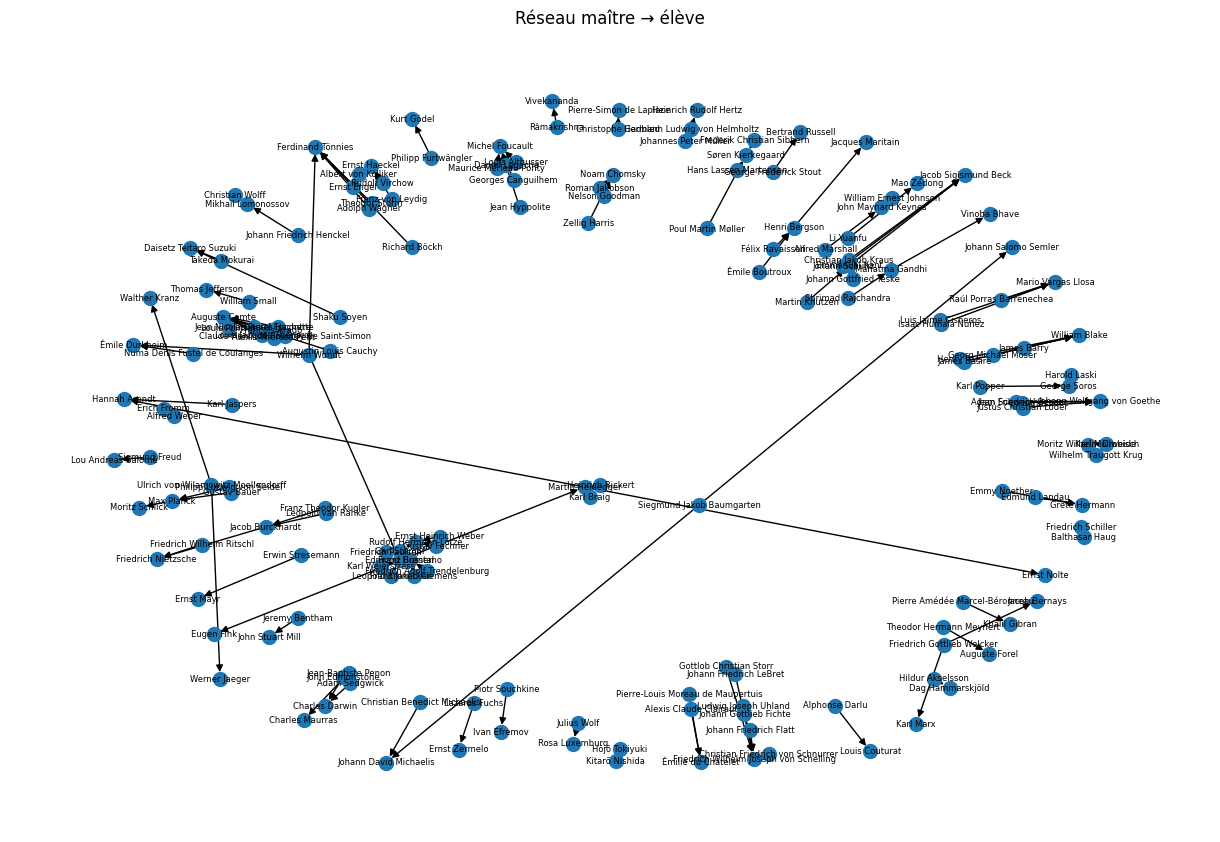

In [6]:

# On conserve les lignes où les deux colonnes sont non nulles
df_me = df[['nom', 'maitre']].dropna()

# Création du graphe
G = nx.DiGraph()
for _, row in df_me.iterrows():
    G.add_edge(row['maitre'], row['nom'])

print(f"Nombre de philosophes : {G.number_of_nodes()}")
print(f"Nombre de relations maître-élève : {G.number_of_edges()}")

# Dessin du graphe
plt.figure()
nx.draw(G, with_labels=True, node_size=100, font_size=6, arrows=True)
plt.title("Réseau maître → élève")
plt.show()


##  Visualisation interactive (Pyvis)

In [7]:
from pyvis.network import Network

net = Network(height="600px", width="100%", directed=True, notebook=False)
net.from_nx(G)

# Génère le fichier HTML SANS l’ouvrir automatiquement (contourne l’erreur)
net.write_html("graph_maitre_eleve.html")


C:\Users\salsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


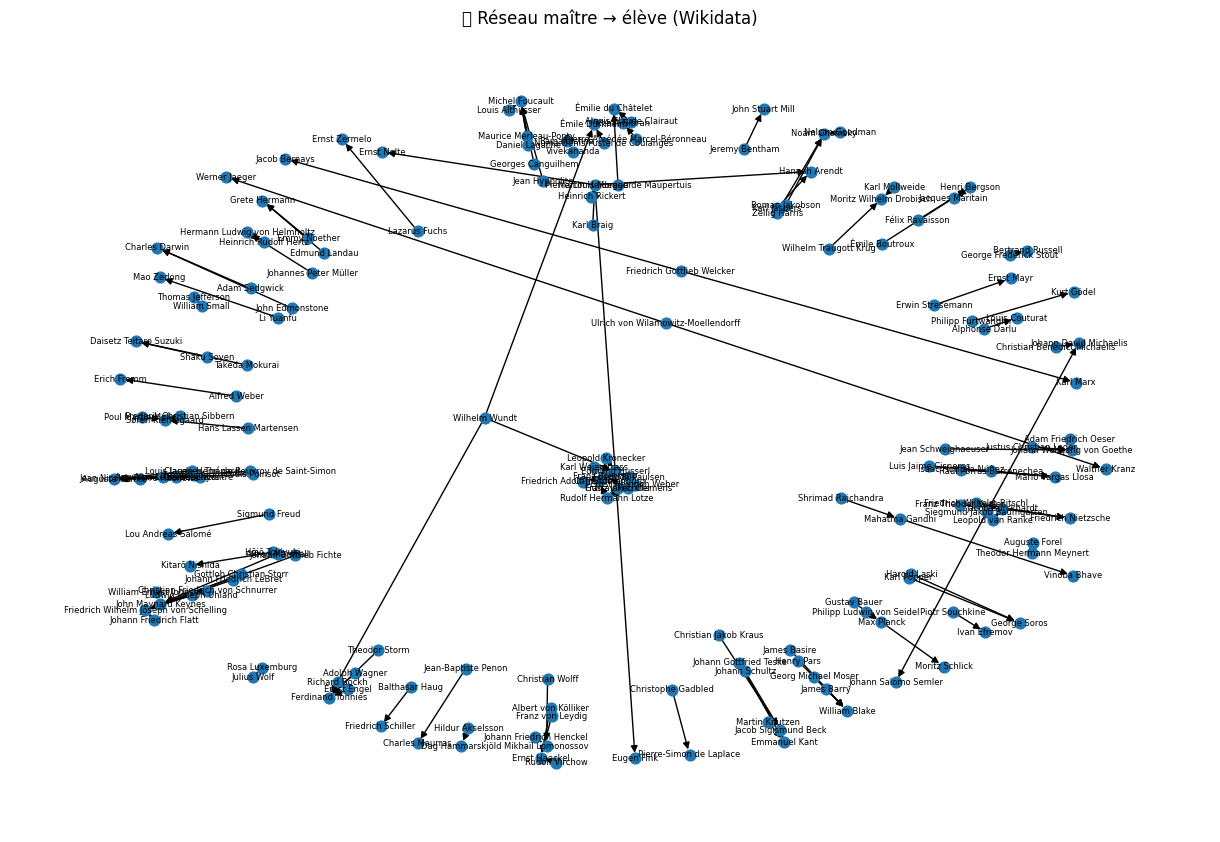

In [8]:
# Visualisation statique
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=60, font_size=6, arrows=True)
plt.title("🧠 Réseau maître → élève (Wikidata)")
plt.show()

## Matrice d’adjacence du graphe maître → élève

In [9]:

adj_matrix = nx.to_pandas_adjacency(G, dtype=int)
adj_matrix.iloc[:10, :10]  # Aperçu


,Friedrich Paulsen,Edmund Husserl,Karl Weierstrass,Franz Brentano,Carl Stumpf,Wilhelm Wundt,Leopold Kronecker,William Small,Thomas Jefferson,James Barry
Friedrich Paulsen,0,1,0,0,0,0,0,0,0,0
Edmund Husserl,0,0,0,0,0,0,0,0,0,0
Karl Weierstrass,0,1,0,0,0,0,0,0,0,0
Franz Brentano,0,1,0,0,1,0,0,0,0,0
Carl Stumpf,0,1,0,0,0,0,0,0,0,0
Wilhelm Wundt,0,1,0,0,0,0,0,0,0,0
Leopold Kronecker,0,1,0,0,0,0,0,0,0,0
William Small,0,0,0,0,0,0,0,0,1,0
Thomas Jefferson,0,0,0,0,0,0,0,0,0,0
James Barry,0,0,0,0,0,0,0,0,0,0
